In [49]:
import numpy as np

In [50]:
import pandas as pd
from datetime import datetime

In [3]:
data = pd.read_csv('nytimes_metadata.csv')

In [4]:
data.head()

,headline,word_count,author_count,lead_author,section,pub_date
0,A Leak-Prone White House Finally Manages to Ke...,1341.0,1,M i c h a e l C r o w l e y,U.S.,2019-12-01T00:15:08+0000
1,Justin Fields Has ‘Heisman Moment’ in Ohio Sta...,727.0,1,J e f f A r n o l d,Sports,2019-12-01T00:33:57+0000
2,Mikaela Shiffrin Learns a New Way to Win: With...,762.0,1,B i l l P e n n i n g t o n,Sports,2019-12-01T00:37:15+0000
3,Leonardo DiCaprio Responds to Brazil’s Preside...,540.0,1,A i m e e O r t i z,World,2019-12-01T01:03:22+0000
4,Cooking Grease Down a Drain Eyed in Sewage Flo...,781.0,2,N e i l V i g d o r,New York,2019-12-01T01:47:35+0000


In [6]:
data.lead_author.iloc[1]

'J e f f A r n o l d'

In [7]:
data.lead_author = data.lead_author.apply(lambda x: str(x).replace(' ', ''))

In [8]:
data.head()

,headline,word_count,author_count,lead_author,section,pub_date
0,A Leak-Prone White House Finally Manages to Ke...,1341.0,1,MichaelCrowley,U.S.,2019-12-01T00:15:08+0000
1,Justin Fields Has ‘Heisman Moment’ in Ohio Sta...,727.0,1,JeffArnold,Sports,2019-12-01T00:33:57+0000
2,Mikaela Shiffrin Learns a New Way to Win: With...,762.0,1,BillPennington,Sports,2019-12-01T00:37:15+0000
3,Leonardo DiCaprio Responds to Brazil’s Preside...,540.0,1,AimeeOrtiz,World,2019-12-01T01:03:22+0000
4,Cooking Grease Down a Drain Eyed in Sewage Flo...,781.0,2,NeilVigdor,New York,2019-12-01T01:47:35+0000


In [10]:
data.groupby('lead_author').count()

,headline,word_count,author_count,section,pub_date
lead_author,,,,,
,70,70,70,70,70
A.C.Shilton,2,2,2,2,2
A.G.Sulzberger,2,2,2,2,2
A.HopeJahren,1,1,1,1,1
A.J.Goldmann,20,20,20,20,20
...,...,...,...,...,...
ZoëLescaze,4,4,4,4,4
ZuzanaBoehmová,1,1,1,1,1
nan,7354,7365,7365,7365,7365


In [16]:
is_missing = data.lead_author == ''

In [17]:
is_missing_rate = is_missing.mean()

In [18]:
is_missing_rate

np.float64(0.0013143565285966428)

In [20]:
demo = '2019-12-01T00:15:08+0000'

In [24]:
date = datetime.strptime(demo, '%Y-%m-%dT%H:%M:%S+0000')

In [25]:
date

datetime.datetime(2019, 12, 1, 0, 15, 8)

In [31]:
data['month'] = data.pub_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S+0000').month)

In [44]:
data['pub_date'] = data.pub_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S+0000'))

In [45]:
data.head()

,headline,word_count,author_count,lead_author,section,pub_date,month
0,A Leak-Prone White House Finally Manages to Ke...,1341.0,1,MichaelCrowley,U.S.,2019-12-01 00:15:08,12
1,Justin Fields Has ‘Heisman Moment’ in Ohio Sta...,727.0,1,JeffArnold,Sports,2019-12-01 00:33:57,12
2,Mikaela Shiffrin Learns a New Way to Win: With...,762.0,1,BillPennington,Sports,2019-12-01 00:37:15,12
3,Leonardo DiCaprio Responds to Brazil’s Preside...,540.0,1,AimeeOrtiz,World,2019-12-01 01:03:22,12
4,Cooking Grease Down a Drain Eyed in Sewage Flo...,781.0,2,NeilVigdor,New York,2019-12-01 01:47:35,12


In [36]:
data.groupby('month').count().pub_date

month
1     4482
2     4122
3     4690
4     4523
5     4737
6     4496
7     4287
8     4109
9     4418
10    4989
11    4420
12    3985
Name: pub_date, dtype: int64

In [37]:
data.lead_author.unique()

array(['MichaelCrowley', 'JeffArnold', 'BillPennington', ...,
       'BarryBergdoll', 'StuartLavietes', 'MarkJosephson'], dtype=object)

In [47]:
gdf = data.groupby('lead_author')

In [53]:
pub_duration = []
for author in gdf.groups:
    sdf = gdf.get_group(author)
    sdf = sdf.sort_values('pub_date')
    times = sdf.pub_date.to_list()
    time_diffs = np.diff(times)
    second_bt = [td.total_seconds() for td in time_diffs]
    pub_duration.append(np.mean(second_bt) / 60 / 60 / 24)

/Users/apple/Desktop/pythonProject10/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/apple/Desktop/pythonProject10/venv/lib/python3.11/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: ylabel='Count'>

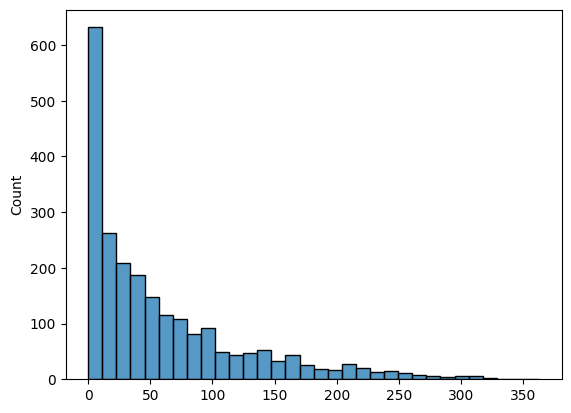

In [55]:
import seaborn as sns
sns.histplot(pub_duration)